## Project 4 Random Forest trial

- Opt for using last 5 years - start small and then branch out if time permitting
- Columns to drop:
    - TREND
    - Avg Age Years and Schooling
    - Trend Value
    - NMSCI
    - GAIN
    - GAIN CI
    - Non-Attempt
    - NonStated
    - Withdrawn
    - NOD NMS Base (last 3 columns are stupid!)
    - Band grading 1 - 6. Certain grades have different bands - based on the score.  Score by percentage.
        - can put in presentation the different band types and %'s
    - 5220 score for Percentils values are Spelling, Parental Education and Parental Occupation subgroups BLANK DATA. = WHY? National.... RACH to look further into this one.

In [48]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline


## Loading and Preprocessing Loans Encoded Data

In [49]:
# Loading data
df_Naplan = pd.read_csv("Naplan_results.csv")
df_Naplan.head(25)

,CALENDAR_YEAR,YEAR_LEVEL,DOMAIN,STATE,SUBGROUP,ENROLLED_STUDENTS,MEAN,MEAN_CI,MEAN_SD,NMS,...,PCTL05,PCTL20,PCTL80,PCTL95,TREND,TREND_VALUE,NOD_MEAN_PREV,NOD_NMS_PREV,NOD_MEAN_BASE,NOD_NMS_BASE
0,2008,3,Grammar and Punctuation,ACT,All,4366.0,419.6,6.2,83.1,93.6,...,276.5,350.1,490.2,551.7,Flat,434.8,NaN,NaN,NaN,NaN
1,2008,3,Grammar and Punctuation,ACT,Parental Education: Bachelor,167.0,445.2,NaN,79.7,95.8,...,308.7,381.3,513.0,565.4,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,3,Grammar and Punctuation,ACT,Parental Education: Certificate,72.0,396.1,NaN,91.0,90.0,...,240.9,319.4,476.6,546.1,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,3,Grammar and Punctuation,ACT,Parental Education: Diploma,52.0,401.4,NaN,69.1,96.9,...,283.7,342.1,456.3,519.2,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,3,Grammar and Punctuation,ACT,Parental Education: Not stated,4009.0,419.8,NaN,82.7,93.7,...,278.0,351.0,489.8,551.1,NaN,NaN,NaN,NaN,NaN,NaN
5,2008,3,Grammar and Punctuation,ACT,Non-LBOTE,3852.0,421.2,6.2,82.5,94.4,...,279.6,352.5,491.1,552.4,NaN,NaN,NaN,NaN,NaN,NaN
6,2008,3,Grammar and Punctuation,ACT,Female,2154.0,431.2,6.9,78.9,96.5,...,299.6,364.2,498.0,559.0,NaN,NaN,NaN,NaN,NaN,NaN
7,2008,3,Grammar and Punctuation,ACT,Indigenous,107.0,352.2,19.7,86.7,81.3,...,227.1,280.7,430.7,503.0,NaN,NaN,NaN,NaN,NaN,NaN
8,2008,3,Grammar and Punctuation,ACT,Male,2212.0,408.2,7.3,85.5,90.8,...,259.6,335.4,481.6,542.6,NaN,NaN,NaN,NaN,NaN,NaN
9,2008,3,Grammar and Punctuation,ACT,LBOTE,405.0,401.7,12.0,86.1,86.1,...,248.4,329.1,475.5,538.6,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
cols= df_Naplan.columns
cols

Index(['CALENDAR_YEAR', 'YEAR_LEVEL', 'DOMAIN', 'STATE', 'SUBGROUP',
       'ENROLLED_STUDENTS', 'MEAN', 'MEAN_CI', 'MEAN_SD', 'NMS', 'NMS_CI',
       'GAIN', 'GAIN_CI', 'EXEMPT', 'ABSENT', 'ASSESSED', 'WITHDRAWN',
       'NONATTEMPT', 'PARTICIPATION_RATE', 'PARTICIPATION_NUMBER',
       'NOT_STATED', 'AVERAGE_AGE', 'YEARS_OF_SCHOOLING', 'BANDCOL1',
       'BANDCOL2', 'BANDCOL3', 'BANDCOL4', 'BANDCOL5', 'BANDCOL6', 'PCTL05',
       'PCTL20', 'PCTL80', 'PCTL95', 'TREND', 'TREND_VALUE', 'NOD_MEAN_PREV',
       'NOD_NMS_PREV', 'NOD_MEAN_BASE', 'NOD_NMS_BASE'],
      dtype='object')

In [51]:
col_drop= ['NONATTEMPT','NMS_CI', 'NOT_STATED','AVERAGE_AGE', 'YEARS_OF_SCHOOLING','TREND', 'TREND_VALUE','WITHDRAWN','NOD_MEAN_PREV','NOD_NMS_PREV', 'NOD_MEAN_BASE', 'NOD_NMS_BASE','GAIN_CI', 'GAIN']

In [52]:
df_Naplan.drop(columns=col_drop, axis=1, inplace=True)

In [53]:
df_Naplan = df_Naplan[df_Naplan['YEAR_LEVEL'] > 3]
df_Naplan

,CALENDAR_YEAR,YEAR_LEVEL,DOMAIN,STATE,SUBGROUP,ENROLLED_STUDENTS,MEAN,MEAN_CI,MEAN_SD,NMS,...,BANDCOL1,BANDCOL2,BANDCOL3,BANDCOL4,BANDCOL5,BANDCOL6,PCTL05,PCTL20,PCTL80,PCTL95
672,2008,5,Grammar and Punctuation,ACT,All,4501.0,513.2,5.8,72.5,95.5,...,3.0,8.4,19.2,27.4,23.2,17.3,392.5,452.3,575.8,630.6
673,2008,5,Grammar and Punctuation,ACT,Parental Education: Bachelor,155.0,550.9,NaN,70.9,96.5,...,2.2,2.6,9.4,21.8,29.2,33.5,425.3,496.7,611.5,659.6
674,2008,5,Grammar and Punctuation,ACT,Parental Education: Certificate,81.0,500.4,NaN,72.2,92.3,...,4.0,12.1,19.3,22.2,25.7,13.1,376.0,434.4,565.5,607.0
675,2008,5,Grammar and Punctuation,ACT,Parental Education: Diploma,45.0,498.1,NaN,65.1,98.2,...,3.0,9.8,30.2,31.1,15.6,11.6,401.0,445.1,546.3,613.6
676,2008,5,Grammar and Punctuation,ACT,Parental Education: Not stated,4145.0,512.7,NaN,72.1,95.7,...,2.9,8.4,19.3,27.7,23.2,17.0,393.2,452.3,574.6,629.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58206,2022,9,Writing,WA,Outer regional,2623.0,538.7,12.5,84.4,78.0,...,20.8,22.4,24.3,19.8,8.7,2.9,390.4,474.9,608.0,667.5
58207,2022,9,Writing,WA,Remote,1073.0,523.8,11.2,86.1,71.7,...,27.4,22.0,24.0,16.9,7.5,1.3,372.5,456.0,598.0,652.1
58208,2022,9,Writing,WA,Very remote,619.0,455.2,22.1,99.3,41.8,...,57.6,18.1,14.0,7.0,2.0,0.6,280.1,373.8,540.6,609.9
58209,2022,9,Writing,WA,Parental Education: Year 11,2933.0,503.1,5.6,82.4,64.8,...,33.6,27.0,22.4,11.0,3.7,0.7,350.7,442.1,569.6,630.2


In [54]:
df_Naplan.isna().sum()

CALENDAR_YEAR              0
YEAR_LEVEL                 0
DOMAIN                     0
STATE                      0
SUBGROUP                   0
ENROLLED_STUDENTS          0
MEAN                       0
MEAN_CI                 7345
MEAN_SD                    0
NMS                        0
EXEMPT                     0
ABSENT                     0
ASSESSED                   0
PARTICIPATION_RATE         0
PARTICIPATION_NUMBER       0
BANDCOL1                   0
BANDCOL2                   0
BANDCOL3                   0
BANDCOL4                   0
BANDCOL5                   0
BANDCOL6                   0
PCTL05                  5220
PCTL20                  5220
PCTL80                  5220
PCTL95                  5220
dtype: int64

In [57]:
df_Naplan.head()

,CALENDAR_YEAR,YEAR_LEVEL,DOMAIN,STATE,SUBGROUP,ENROLLED_STUDENTS,MEAN,MEAN_CI,MEAN_SD,NMS,...,BANDCOL1,BANDCOL2,BANDCOL3,BANDCOL4,BANDCOL5,BANDCOL6,PCTL05,PCTL20,PCTL80,PCTL95
672,2008,5,Grammar and Punctuation,ACT,All,4501.0,513.2,5.8,72.5,95.5,...,3.0,8.4,19.2,27.4,23.2,17.3,392.5,452.3,575.8,630.6
673,2008,5,Grammar and Punctuation,ACT,Parental Education: Bachelor,155.0,550.9,NaN,70.9,96.5,...,2.2,2.6,9.4,21.8,29.2,33.5,425.3,496.7,611.5,659.6
674,2008,5,Grammar and Punctuation,ACT,Parental Education: Certificate,81.0,500.4,NaN,72.2,92.3,...,4.0,12.1,19.3,22.2,25.7,13.1,376.0,434.4,565.5,607.0
675,2008,5,Grammar and Punctuation,ACT,Parental Education: Diploma,45.0,498.1,NaN,65.1,98.2,...,3.0,9.8,30.2,31.1,15.6,11.6,401.0,445.1,546.3,613.6
676,2008,5,Grammar and Punctuation,ACT,Parental Education: Not stated,4145.0,512.7,NaN,72.1,95.7,...,2.9,8.4,19.3,27.7,23.2,17.0,393.2,452.3,574.6,629.6


In [55]:
selected_columns = ['CALENDAR_YEAR', 'YEAR_LEVEL',
       'ENROLLED_STUDENTS', 'MEAN', 'MEAN_CI', 'MEAN_SD', 'NMS', 'NMS_CI',
       'BANDCOL2', 'BANDCOL3', 'BANDCOL4', 'BANDCOL5', 'BANDCOL6', 'PCTL05',
       'GAIN', 'GAIN_CI', 'EXEMPT', 'ABSENT', 'ASSESSED', 'WITHDRAWN',
       'NONATTEMPT', 'PARTICIPATION_RATE', 'PARTICIPATION_NUMBER','BANDCOL1',
       'PCTL20', 'PCTL80', 'PCTL95','TREND_VALUE']

In [56]:
#Define features
X = df_Naplan[selected_columns]

y = df_Naplan['SUBGROUP'].ravel()
y[:11]

KeyError: "['NMS_CI', 'GAIN', 'GAIN_CI', 'WITHDRAWN', 'NONATTEMPT', 'TREND_VALUE'] not in index"

In [ ]:
df_Naplan.dtypes

CALENDAR_YEAR             int64
YEAR_LEVEL                int64
DOMAIN                   object
STATE                    object
SUBGROUP                 object
ENROLLED_STUDENTS       float64
MEAN                    float64
MEAN_CI                 float64
MEAN_SD                 float64
NMS                     float64
NMS_CI                  float64
GAIN                    float64
GAIN_CI                 float64
EXEMPT                  float64
ABSENT                  float64
ASSESSED                float64
WITHDRAWN               float64
NONATTEMPT              float64
PARTICIPATION_RATE      float64
PARTICIPATION_NUMBER      int64
NOT_STATED              float64
AVERAGE_AGE              object
YEARS_OF_SCHOOLING       object
BANDCOL1                float64
BANDCOL2                float64
BANDCOL3                float64
BANDCOL4                float64
BANDCOL5                float64
BANDCOL6                float64
PCTL05                  float64
PCTL20                  float64
PCTL80  

In [ ]:
# Define target vector
y = df_Naplan["SUBGROUP"].ravel()


In [ ]:
# Define features set
X = df_Naplan.copy()
X.head()
X.drop("SUBGROUP", axis=1, inplace=True)

In [ ]:
selected_columns = ['CALENDAR_YEAR', 'YEAR_LEVEL',
       'ENROLLED_STUDENTS', 'MEAN', 'MEAN_CI', 'MEAN_SD', 'NMS', 'NMS_CI',
       'BANDCOL2', 'BANDCOL3', 'BANDCOL4', 'BANDCOL5', 'BANDCOL6', 'PCTL05',
       'GAIN', 'GAIN_CI', 'EXEMPT', 'ABSENT', 'ASSESSED', 'WITHDRAWN',
       'NONATTEMPT', 'PARTICIPATION_RATE', 'PARTICIPATION_NUMBER','BANDCOL1',
       'PCTL20', 'PCTL80', 'PCTL95','TREND_VALUE']

In [ ]:

# Convert categorical data to numeric with `pd.get_dummies`
df = df.drop('CLASSIFICATION', axis=1)
df_encoded
df_encoded = pd.get_dummies(df)

In [ ]:
# Split our preprocessed data into our features and target arrays
X = df_encoded.drop(['IS_SUCCESSFUL'], axis=1)
y = df_encoded['IS_SUCCESSFUL']

# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Creating StandardScaler instance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


ValueError: could not convert string to float: 'Grammar and Punctuation'

In [ ]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

ValueError: could not convert string to float: 'Numeracy'

In [ ]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

NameError: name 'X_scaler' is not defined

## Fitting the Random Forest Model

In [ ]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [ ]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

NameError: name 'X_train_scaled' is not defined

## Making Predictions Using the Random Forest Model

In [ ]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

## Model Evaluation

In [ ]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [ ]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,50,34
Actual 1,26,15


Accuracy Score : 0.52
Classification Report
              precision    recall  f1-score   support

           0       0.66      0.60      0.62        84
           1       0.31      0.37      0.33        41

    accuracy                           0.52       125
   macro avg       0.48      0.48      0.48       125
weighted avg       0.54      0.52      0.53       125



## Feature Importance

In [ ]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.42871537959784756, 'age'),
 (0.322909180511852, 'month_num'),
 (0.08373400008559587, 'term'),
 (0.054795639837519644, 'amount'),
 (0.023826066130178958, 'education_High School or Below'),
 (0.023805501611235368, 'education_college'),
 (0.020274246776222464, 'gender_male'),
 (0.01986699331709372, 'education_Bachelor'),
 (0.019479294982300867, 'gender_female'),
 (0.0025936971501533874, 'education_Master or Above')]

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

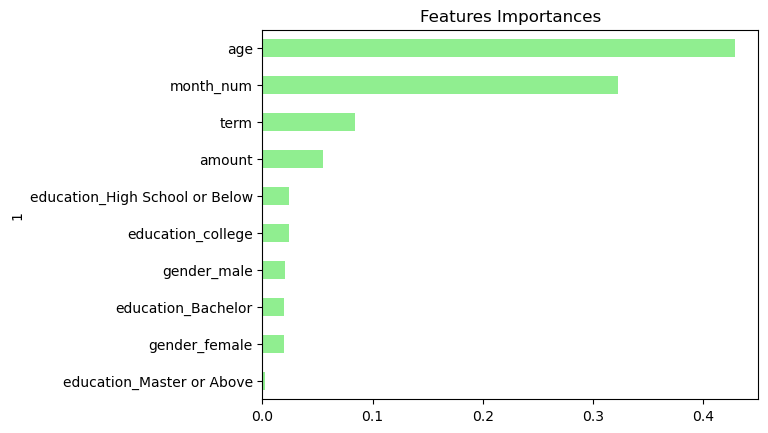

In [ ]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)